# 1. Introduction

Percolation is a simple model in statistical physics that has been well studied. It has a wide range of uses including modelling resistor networks, ecological disturbances (like forest fires), epidemics, and was first used to model fluid flow through porous materials.
<br><br> Percolation theory describes the behaviour of _clusters_ in a large lattice of dimension $d$. The two most studied percolation models are site percolation and bond percolation. In site percolation, the lattice vertices are the relevant quantitities. Each lattice vertex/site is either "occupied", with probability $p$, or "unoccupied", with probability 1-$p$. A cluster is a group of occupied lattice sites that are connected by a chain of nearest neigbour links (i.e for every site in a cluster, one of its nearest neigbours is also occupied) [1]. 
<br><br> Bond percolation is a similar model where the lattice bonds are the relevant quantities. Each bond is either "occupied", with probability $p$, or "unoccupied", with probability 1-$p$. In both models, the probability of a site/bond being occupied is independent of the status of its neighbours. The system is said to _percolate_ when the largest cluster spans the lattice (i.e. it extends from one lattice boundary to the opposite boundary).
<br><br>The critical proabibility value, $p_{c}$, is the probability at which the system can first percolate. For bond percolation in two dimensions, $p_{c} = \frac{1}{2}$. No analytic expression exists for site percolation in two dimensions, or for either model in 3 dimensions or above [2]. 
<br><br>Percolation is a random process. Different percolation lattices will contain clusters of different shapes and sizes - we wish to discuss their average properties. Hence, We often want to find the average value of some observable $Q(p)$ (e.g. average cluster size) over a range of values of $p$. In this report we will explore the most popular algorithm for doing this, the Newman-Ziff algorithm.

# 2. Background theory

For percolation on an infinite lattice, the critical probability $p_{c}$ marks the position of a phase transition. It is the probability at which an infinite cluster first appears. A typical order paramater of the phase transition is the _percolation strength_, $P_{\infty}(p)$. This is the fraction of sites belonging to the infinite cluster.  
<br>An important quantity in percolation theory is the cluster number, $n_{s}(p)$. This is defined as the number of clusters of size $s$ present in the lattice, divided by the total number of lattice sites. From the cluster number, we can calculate the average cluster size, $S(p)$:
$$S(p) = \sum\limits_{s=1}^{\infty}\frac{s^{2}n_{s}(p)}{p}$$
<br>Near the critical point, $S$ and $P_{\infty}$ exhibit the following behaviour:
$$S(p)\sim|p-p_{c}|^{-\gamma}$$
$$P_{\infty}(p)\sim|p-p_{c}|^{\beta}$$
where $\gamma$ and $\beta$ are _critical exponents_.
<br>Since, we cannot simulate an infinite lattice we use the theory of finite size scaling to understand the behavior of quantities near the critical probability on finite lattices [1]. 
<br><br>If a quantity $X$ is expected to scale as $|p-p_{c}|^{-x}$ for an infinite lattice, then for a lattice of linear dimension $L$ we expect:
$$X(L,\xi) = \xi ^{x/\upsilon}X_{1}(L/\xi)$$
where $\xi$ is the _correlation length_.
<br><br>Near $p_c$ the correlation length diverges and so we can work in the limit $L<<\xi$. Therefore, at $p_c$ we expect:
$$X\propto L^{x/\upsilon}$$
<br>For a finite lattice, the probability that a system percolates $\Pi(p)$ is no longer a step function but varies smoothly with $p$. We define the average occupation probability at which the system percolates as:
$$p_{av} = \int p \frac{d\Pi(p)}{dp} dp$$
<br>Thus, using the above expressions, we obtain the following relations for a finite lattice of linear dimension $L$ at the critical probability $p_{c}$:
$$|p_{av}-p_{c}|\propto L^{-1/\upsilon}$$
$$P_{\infty}(L)\propto L^{-\beta/\upsilon}$$
$$S(L)\propto L^{\gamma/\upsilon}$$
<br>It can be shown that, in two dimensions, the critical exponents satisfy the follwing identity:
$$\upsilon = \beta + \frac{\gamma}{2}$$

# 3. Percolation Algorithms

### 3.1 Conventional Algoritm

Let us first consider the conventional direct percolation algorithm. Consider some observable $Q(p)$ that we wish to calculate over a range of values of $p$. We must perform simulations at many closely spaced values of $p$, and interpolate between measurements to obtain a continous curve of $Q(p)$. This, however, introduces error into the results and it is better instead to measure $Q$ for a fixed number $n$ of occupied sites in the range of interest. The probability of there being exactly $n$ occupied sites out of a possible $N$ sites is given by the Binomial distribution:
<br>$$B(N,n,p) = \binom{N}{n}p^{n}(1-p)^{N-n}$$ 
If we measure the observable for all values of $n$ (giving a set of measurements {$Q_{n}$}) we can find $Q(p)$ for all $p$:
<br>$$Q(p)=\sum\limits_{n=0}^{N}B(N,n,p)Q_{n}$$
The same expression applies for bond percolation but replacing $N$ with $M$, where $M$ is the total number of bonds. 
<br><br>For site percolation, starting with an empty lattice of $N$ sites and $M$ bonds , it takes time $O(N)$ to fill the lattice and time $O(M)$ to find all the clusters for each value of $n$. Hence, the calculation takes time $O(M+N)$ for each value of $n$ and so $O(N^{2}+MN)$ overall. For a regular lattice $M=\frac{1}{2}zN$, where $z$ is the co-ordination number, and so $O(N^{2}+MN)$ is equivalent to $O(N^{2})$ . The algorithm complexity for bond percolation is the same as for site percolation on a regular lattice. [2]

### 2.2 Newmann-Ziff Algorithm
The Newman-Ziff Algorithm takes time $O(N)$ which is a large improvement on the $O(N^{2})$ complexity of the conventional algorithm. 
<br><br>In the conventional percolation algorithm, a new state of the lattice with $n$ occupied sites/bonds is created for each value of $n$. However, since to measure $Q(p)$ we generate states for all values of $n$ from zero to $N$, we can save time using the fact that a correct state with $n+1$ occupied sites/bonds can be derived from a correct state with $n$ occupied sites/bonds by adding one extra randomly chosen site/bond. The whole set of percolation states is derived from an empty lattice by adding sites/bonds one by one. This is the idea at the core of the algorithm. [3]
<br><br>Consider the case of bond percolation. We initially have an empty lattice with all $M$ bonds unoccupied so that each site is a cluster of size 1. To begin, we must randomly choose the order which the bonds are occupied. A simple way to do this is as follows:  
1. Create a list of the bonds with positions labelled from 1 to $M$
2. For $i=1$, choose a number $j$ randomly in the range $i\le j\le M$ 
3. Exchange the bonds at positions $i$ and $j$
4. Repeat this for all $i$ in the range $1\le i\le M$

This generates all possible permutations of bond orders with equal probability and has complexity $O(M)$ [2].
<br><br>We can then occupy the bonds in the order that has been chosen. To keep track of the cluster configuration of the lattice we use a _union/find_ algorithm. When a new bond is occupied, these algorithms find the clusters the sites at either end of the bond are part of. If the sites are part of different clusters, the two clusters are combined into a single cluster.
In their paper of 2001 Newman and Ziff discuss different union/find algorithms. The most efficient one is a weighted union/find algorithm with path compression.
<br><br>This makes use of _tree data structures_. These are hierarchical structures that are used to represent data in a way that is easy to navigate. They consist of nodes connected by edges in a hierarchical relationship with the _root_ being the topmost node of the tree. In our case, each cluster is stored as a separate tree with each site in the cluster corresponding to a node. Each cluster has one root site (which is the root of the tree) and all other sites have a _pointer_ that points towards the root or towards another site in the cluster so that by following the pointers we can go from any site in the cluster to the root of that cluster. 
<br><br>When a new bond is added, the pointers belonging to the sites at each end of the bond are followed. If the pointers lead to the same root site, then the sites are part of the same cluster. After the path is traversed, each pointer along the path is changed to point directly to the root of the cluster. This is called _path compression_ and it speeds up the traversal of the cluster. If instead the pointers lead to different roots (so the sites are part of different clusters), the two clusters are combined by adding a pointer from the root of one cluster to the root of the other. The pointer is always orientated to point towards the larger of the two clusters. To do this, the size of a cluster (i.e number of sites) is stored at the root site of each cluster. When two clusters are combined, the size of the larger cluster is updated by adding to it the size of the smaller cluster. This process is repeated until all bonds in the lattice are occupied [2].
<br><br>It can be shown that time taken for the union/find algorithm is $O(1)$ in lattice size. Therefore, it takes time $O(1)$ to occupy each bond and so time $O(M)$ to add all the bonds (whilst keeping track of all the clusters). Since it also takes time $O(M)$ to generate the order in which bonds are added, for bond percolation, the Newman Ziff algorithm has overall complexity $O(M)$. The algorithm is very similar for site percolation (the sites are occupied in a random order instead of the bonds) and, for a regular lattice, has complexity $O(N)$ [2].

# 4. Implementation of Newman-Ziff algorithm
### 4.1 Programme
We will now implement the Newman-Ziff algorithm. The code is based of that given in appendix A of the paper by Newman and Ziff (written in C) but has been modified for python [2]. The programme is for site percolation on a square lattice with $N=L\times{L}$ sites. 

In [1]:
%matplotlib notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random
import scipy

L = 64
N = L**2
Empty = -N-1
Boundary = -N-2

Sites are indexed with an integer label, taking values from 0 to $N-1$.
 <br><br>We first construct an array "ptr" which contains the pointer for each lattice site and stores the size of each cluster at its root site. In the array, each non-root occupied site is labelled with the index of its parent site in the tree (i.e the site its pointer points towards). Root sites are labelled with a value that is equal to minus the size of the cluster (the negative means root sites can be easily distinguished from non-root sites). All unoccupied sites takes the value of "Empty".  

In [2]:
ptr = np.zeros((N), dtype=int) #array of pointers

We define a function "nearestneighbour" which generates the nearest neigbours of each site and stores them in an array "nn". If a site is on a boundary of the lattice, its nearest neighbour (in the direction of the boundary) will have a label "Boundary". 

In [3]:
nn = np.zeros((N,4), dtype=int) #array of nearest neighbours

def nearestneighbour():

    """constructs a numpy.ndarray of the nearest neighbours of each site in a square lattice
    with N=L*L sites."""
        
    for i in range(N):
        nn[i,0] = (i+1)%N
        nn[i,1] = (i-1)%N
        nn[i,2] = (i+L)%N
        nn[i,3] = (i-L)%N

        if i%L==0:
            nn[i,1]=Boundary
       
        if (i+1)%L==0:
            nn[i,0]=Boundary
            
        if np.floor(i/L)==0:
            nn[i,3]=Boundary
            
        if np.floor(i/L)==L-1:
            nn[i,2]=Boundary
            

We also construct a function "permutate" which creates a random permutation of the site labels and stores them in an array "order". This is the order in which the sites will be occupied.

In [4]:
order = np.zeros(N, dtype=int)  #occupation order array

def permutate():

    """constructs a random permutation of the site labels (integers from 0 to N-1) using the algorithm 
    given earlier and stores it in a numpy.ndarray """
    
    for i in range(N):
        order[i]=i

    for i in range(N):
        
        #generates a random number j between i and N
        j = random.randint(i,N-1)
        
        #swaps the positions of sites i and j
        temp=order[i]
        order[i] = order[j]
        order[j] = temp

The "findroot" function returns the (label of the)  root site of the cluster each site is part of and also carries out path compression.

In [5]:
def findroot(i):
   
    """Recursive function that returns the label (an integer from 0 to N-1) of the root site of the cluster 
    that the input site (label i) is part of. Also carries out path compression by 
    setting the value of ptr[i] to be the (label of the) root of the tree that site i is part of . """
    
    if ptr[i]<0:
        return i
    else:
        ptr[i]=findroot(ptr[i])
        return ptr[i]

The main part of the algorithm is contained within the function "percolate". This occupies the lattice sites in the order given by the array "order" and finds the roots of the adjacent sites using the "findroot" function. If the sites are part of different clusters, the clusters are combined by adding the smaller cluster to the larger cluster. The function keeps track of the largest cluster in the lattice and the average cluster size. 

In [6]:
Lattice = np.zeros((L,L), dtype=int)
Percolation = np.zeros(N, dtype=int)
largest_cluster_size = []
average_cluster_size = []
n=[]

def percolate():
    
    Percolation = np.zeros(N, dtype=int)

    """Model for site percolation on a square lattice with N sites using the Newman-Ziff 
    algorithim."""
    largest = 0 #size of largest cluster
    total = 0   #total number of clusters
    
    for i in range(0,N):
        #constructs empty lattice
        ptr[i] = Empty
            
            
    for i in range(N):
        #occupies sites in order
        root_1 = site_1 = order[i]
        ptr[site_1] = -1
        total += 1

        for j in range(4):
            #finds nearest neighbours
            site_2 = nn[site_1, j]
            
            if site_2 != Boundary:

                if ptr[site_2] != Empty:
                #If nearest neighbour is occupied, find root of cluster it is part of
                    root_2 = findroot(site_2)
                

                    if root_2 != root_1: 
                        #If root of site and its nearest neighbour are different
                        #adds smaller cluster to larger cluster
                        total -= 1  

                        if ptr[root_1]>ptr[root_2]:
                            ptr[root_2] += ptr[root_1]  
                            ptr[root_1] = root_2
                            root_1 = root_2

                        else:
                            ptr[root_1] += ptr[root_2]
                            ptr[root_2] = root_1

                        if -ptr[root_1] > largest:
                            #Keeps track of largest cluster in lattice
                            largest = -ptr[root_1]
                   
        n.append((i+1))
        largest_cluster_size.append(largest/N)
        average_cluster_size.append((i+1)/(N*total))
       

### 4.2 Computing observables and critical exponents

We now use our programme to compute observables of the system over a range of $p$ values. 
<br><br>We first use the algorithm to find the average occupation probability at which the system percolates, $p_{av}$ (As $N\to \infty$, $p_{av}\to p_{c}$).
<br>We start the lattice in an initial configuration where there are occupied sites along two opposite edges of the lattice (i.e there are two initial clusters). We then occupy the remaining lattice sites using the algorithm and at each step we check the roots of the two initial clusters using the "findroot" function. If the clusters have the same root (i.e are now part of the same cluster), then the cluster spans from one edge of the lattice to the opposite edge and so percolation has occurred. Since the union/find algorithm has complexity $O(1)$ and we only need to check two sites per step, checking for percolation in this way does not increase the complexity of the algorithm. We note that when checking for percolation using this method, we no longer have a square lattice. [2]
<br><br>We run the programme for $k$ permutations of the occupation order and for each find the value of occupation number at which percolation occurs. Taking the mean and standard deviation of this we get an estimate of the average occupation number at which percolation occcurs, $n_{av}$, and the associated error. Dividing by $N$ gives us an estimate of $p_{av}$. The results for $k=500$ for different lattice sizes are stored in the file 'paverage.npy' and the data is plotted in the graph below:

From the graph we obtain $p_c = 0.593\pm 0.02$. This is in agreement with the accepted value [1].
<br>In section 2 we introduced the relationship $|p_{av}-p_{c}|\propto L^{-1/\upsilon}$. Hence, by plotting $log(|p_{av}-p_{c}|)$ against $log(L)$ we can determine the critical exponent $\upsilon$:


The percolation strength, $P_{\infty,n}$, is the fraction of sites that are part of the spanning cluster. Before percolation, $P_{\infty,n}=0$ and after percolation, $P_{\infty,n}$ is given by the size of the largest cluster divided by $n$ [4]. Using the function "percolate", we find $P_{\infty,n}$ as a function of $n$ (averaged over 500 runs) and then perform a convolution with the Binomial distribution to give $P_{\infty}(p)$. The data for $P_{\infty}(p_{c})$ for different lattice sizes is stored in the file 'Percolationstrength.npy'.
<br><br> As shown in section 2 we expect $P_{\infty}(L)\propto L^{-\beta/\upsilon}$ near $p=p_{c}$ and so plotting $log(L)$ against $log(P_{\infty}(p_{c}))$ allows us to determine the crictical exponent $\beta$:

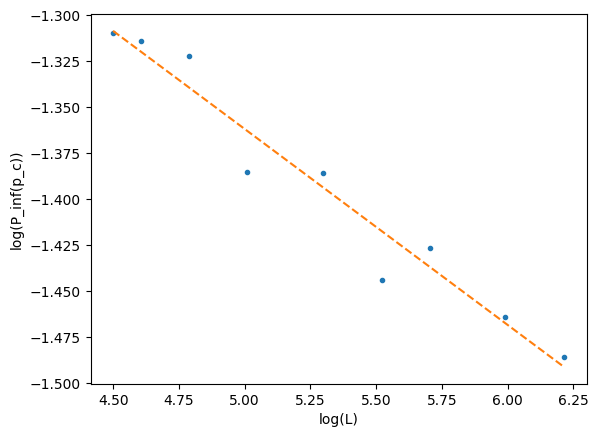

LinregressResult(slope=-0.10648417649483634, intercept=-0.8294761888243988, rvalue=-0.9754956061780177, pvalue=7.40455073874609e-06, stderr=0.009077594000747135, intercept_stderr=0.04832801847720421)

In [7]:
percolation_strength = np.load('Percolationstrength.npy')
plt.plot(np.log(percolation_strength[0]), np.log(percolation_strength[1]), '.' )
z = np.polyfit(np.log(percolation_strength[0]),np.log(percolation_strength[1]),1)
f = np.poly1d(z)
plt.plot(np.log(percolation_strength[0]), f(np.log(percolation_strength[0])), linestyle='--')
plt.xlabel('log(L)')
plt.ylabel('log(P_inf(p_c))')
plt.show()
scipy.stats.linregress(np.log(percolation_strength[0]),np.log(percolation_strength[1]))

The function "percolate" keeps track of the sum of the squared cluster sizes for each $n$. We this divide by $n$ and convolve with the binomal distribution to obtain the average cluster size as a function of $p$, $S(p)$. The values for $S(p_c)$ for different lattice sizes (averaged over 500 runs) are stored in the file 'averagecluster.npy'. We expect $S(L)\propto L^{\gamma/\upsilon}$ near $p = p_{c}$ and so plotting $log(L)$ against $log(S(p_{c}))$ allows us to determine the critical exponent $\gamma$:

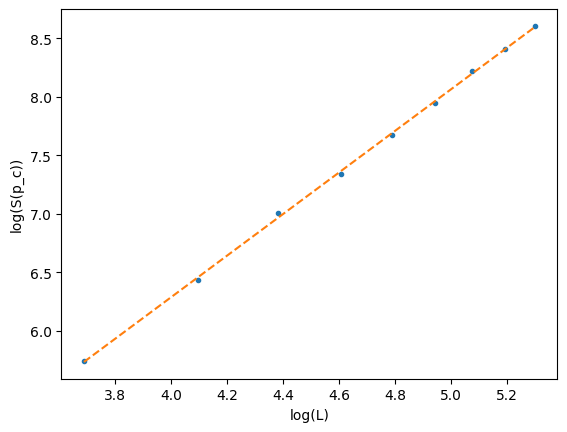

LinregressResult(slope=1.776469136235123, intercept=-0.8171375963737013, rvalue=0.9997713365501241, pvalue=5.951536803020157e-13, stderr=0.014361391138566201, intercept_stderr=0.06751678519611105)

In [8]:
average_cluster = np.load('averagecluster.npy')
plt.plot(np.log(average_cluster[0]), np.log(average_cluster[1]), '.' )
z = np.polyfit(np.log(average_cluster[0]),np.log(average_cluster[1]),1)
f = np.poly1d(z)
plt.plot(np.log(average_cluster[0]), f(np.log(average_cluster[0])), linestyle='--')
plt.xlabel('log(L)')
plt.ylabel('log(S(p_c))')
plt.show()
scipy.stats.linregress(np.log(average_cluster[0]),np.log(average_cluster[1]))

### 4.3 Algorithm performance
Using the "findroot" function, we kept track of the total number of steps, $n_{step}$, taken through trees during each run of the algorithm for different lattice sizes (averaged over 100 runs). The data is stored in the file 'totalsteps.npy'. Assuming a complexity of $O(N^{\alpha})$, plotting $log(N)$ against $log(n_{step})$ allows us to determine the value of $\alpha$ from the gradient:

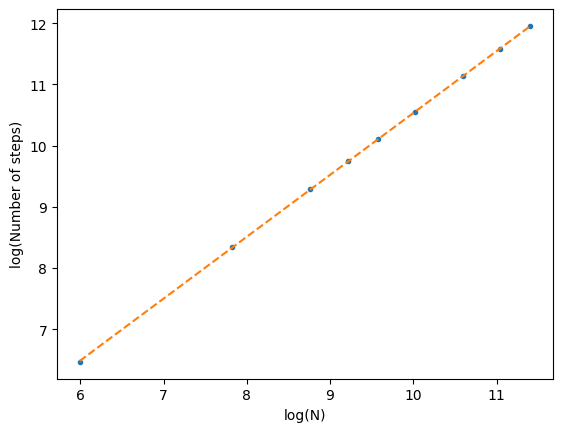

LinregressResult(slope=1.0114754265772326, intercept=0.4186425849073814, rvalue=0.9999878812074859, pvalue=2.0400445619235518e-17, stderr=0.0018821530525304942, intercept_stderr=0.017913178405993463)

In [9]:
total_steps = np.load('totalsteps.npy')
plt.plot(np.log(total_steps[0]),np.log(total_steps[1]), '.')
z = np.polyfit(np.log(total_steps[0]),np.log(total_steps[1]),1)
f = np.poly1d(z)
plt.plot(np.log(total_steps[0]), f(np.log(total_steps[0])), linestyle='--')
plt.xlabel('log(N)')
plt.ylabel('log(Number of steps)')
plt.show()
scipy.stats.linregress(np.log(total_steps[0]),np.log(total_steps[1]))

From the graph we obtain $\alpha = 1.011 \pm 0.002$. The expected complexity is $O(N)$ (i.e $\alpha = 1$), so the result deviates very slightly from the expected behaviour. Data was only taken up to $N = 10^{5}$ (due to computation time) and so this is possibly the reason for the small deviation.

We can also find the time taken for the algorithm to run for different lattice sizes (averaged over 100 runs) using the "timeit" module. The data from this is stored in the file 'times.npy'. Again, assuming a complexity of $O(N^{\alpha})$, plotting $log(N)$ against $log(time)$ gives another estimate for $\alpha$:

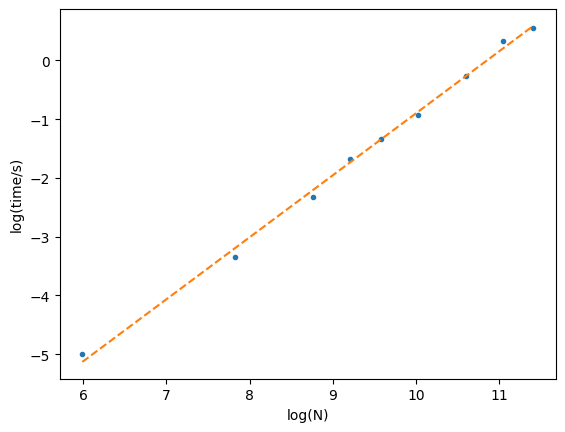

LinregressResult(slope=1.0557925643435377, intercept=-11.456351515941105, rvalue=0.9985183475782871, pvalue=4.116455774010333e-10, stderr=0.021747070738619402, intercept_stderr=0.2069752815398831)

In [10]:
time = np.load('times.npy')
plt.plot(np.log(time[0]),np.log(time[1]),'.')
z = np.polyfit(np.log(time[0]),np.log(time[1]),1)
f = np.poly1d(z)
plt.plot(np.log(time[0]), f(np.log(time[0])), linestyle='--')
plt.xlabel('log(N)')
plt.ylabel('log(time/s)')
plt.show()
scipy.stats.linregress(np.log(time[0]),np.log(time[1]))

From this graph we obtain $\alpha = 1.06 \pm 0.02$. Here, the slight deviation from the expected complexity can be explained by the increasing incidence of cache misses as N becomes large [2]. This is due to inaccuracies in the hardware and is not caused by the algorithm itself. 
<br><br>Although the programme perfomed at complexity very close to $O(N)$, the project was still limited by computation time. On the computer used, one run of the algorithm for an $N = 1000\times 1000$ lattice took around 40 seconds. Hence, for 1000 runs (number used in [2]) this amounts to 11 hours computation time. Comparing this to the 2.9 seconds taken for one run of an $N=1000\times 1000$ lattice in [2], it is clear that a better quality computer would have allowed us to take readings for larger lattice sizes, and perform more runs for each lattice size, which would've improved the accuracy of the results.